When we want to read a book, we always have a few considerations before deciding which book to read. These considerations include how popular the book is, how many people have read it, who wrote it, the book's rating, etc. Therefore, analysis becomes important in deciding which book we want to read.

This notebook contains an analysis of the Goodreads books dataset to help us decide which book we should read next:

# Data Loading

### Importing necessary libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.plotting.register_matplotlib_converters()
%matplotlib inline

### Importing Goodreads books dataset

In [38]:
df_book = pd.read_csv("books.csv", on_bad_lines="skip")

In [39]:
df_book.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [40]:
df_book.shape

(11123, 12)

In [41]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


# Data Cleaning

In [42]:
# Stripping whitespace from column names
df_book.rename(columns=lambda x: x.strip(), inplace=True)

In [51]:
# Replacing the author of the Harry Potter series with just J.K. Rowling
df_book.replace(to_replace="J.K. Rowling/Mary GrandPré", value="J.K. Rowling", inplace=True)

In [44]:
# Dropping unnecessary columns
df_book = df_book.drop(["bookID", "isbn", "isbn13"], axis="columns")

In [45]:
# Checking the data types of each column
df_book.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

We can see that the publication_date column has an object data type, so we need to convert it to datetime.

In [46]:
df_book["publication_date"] = pd.to_datetime(df_book["publication_date"], errors="coerce")

In [47]:
# Checking null values
df_book.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

After changing the publication_date data type to datetime, we observed that there are null values. We need to remove the records with null values.

In [48]:
# Removing index with null values
df_book = df_book.dropna()

In [49]:
df_book.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

# Exploratory Data Analysis

In [50]:
df_book.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
count,11121.000000,11121.000000,1.112100e+04,11121.000000,11121
mean,3.934058,336.343944,1.794512e+04,542.118874,2000-08-29 03:05:33.099541504
min,0.000000,0.000000,0.000000e+00,0.000000,1900-01-01 00:00:00
25%,3.770000,192.000000,1.040000e+02,9.000000,1998-07-17 00:00:00
50%,3.960000,299.000000,7.450000e+02,47.000000,2003-03-01 00:00:00
75%,4.140000,416.000000,4.996000e+03,238.000000,2005-10-01 00:00:00
max,5.000000,6576.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00
std,0.350513,241.129968,1.125091e+05,2576.845134,NaN


### Top 10 most rated books

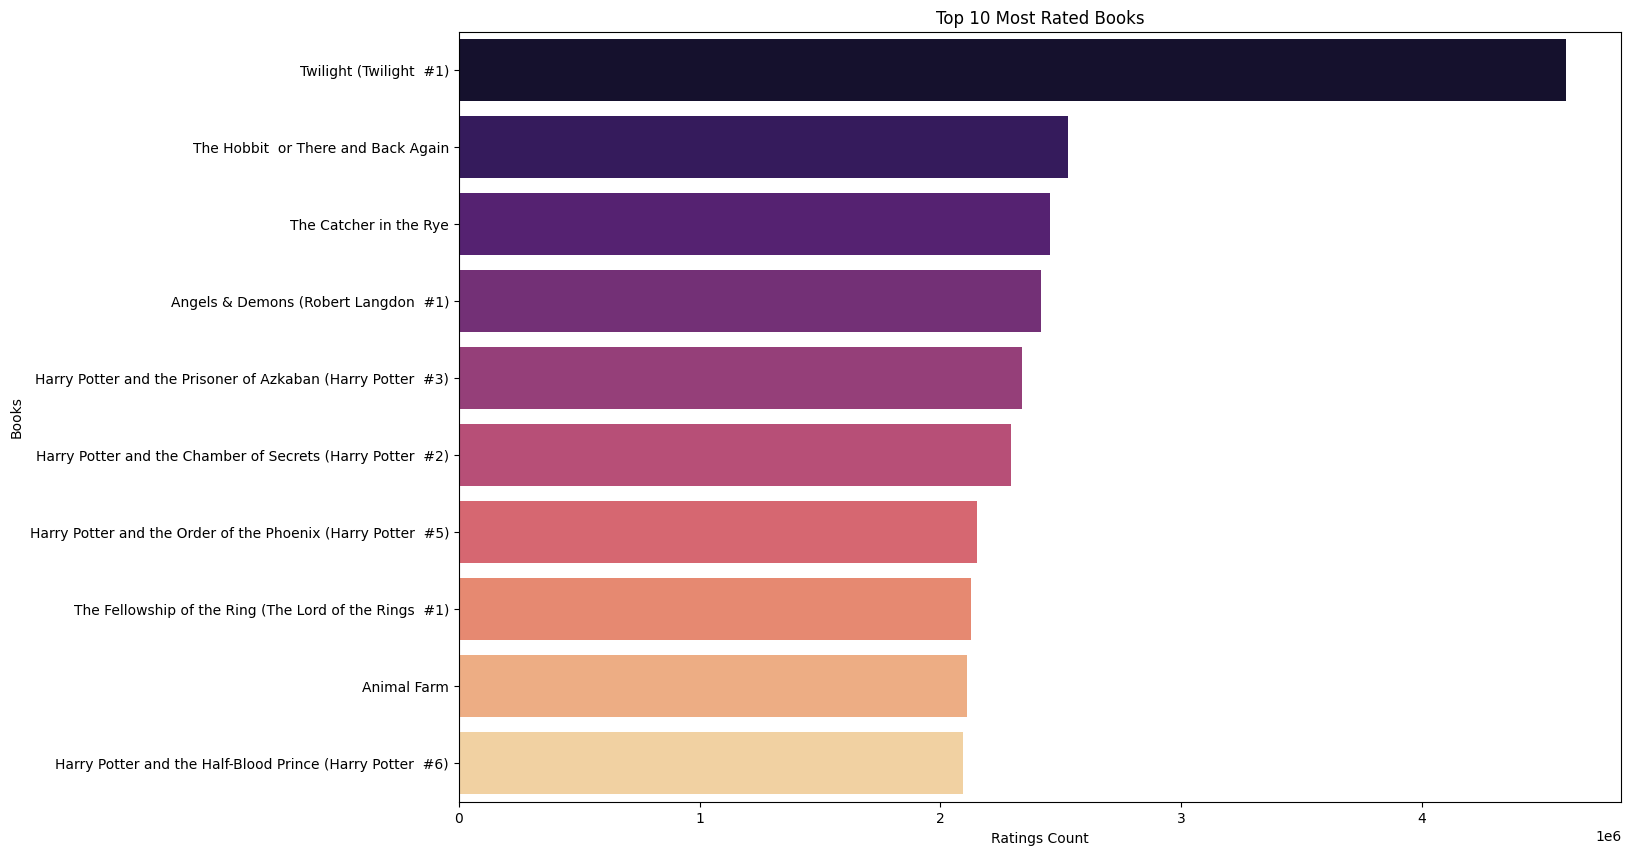

In [66]:
most_rated = df_book.sort_values(by=["ratings_count"], ascending=False).head(10).set_index("title")
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="ratings_count", y=most_rated.index, data=most_rated, hue=most_rated.index, legend=False, palette="magma")
ax.set_title("Top 10 Most Rated Books")
ax.set_xlabel("Ratings Count")
ax.set_ylabel("Books")
plt.show()

We can see that Twilight is the most-rated book in the Goodreads dataset. On the other hand, the Harry Potter series dominates the list of the top 10 most-rated books.

### Top 10 books with highest average rating

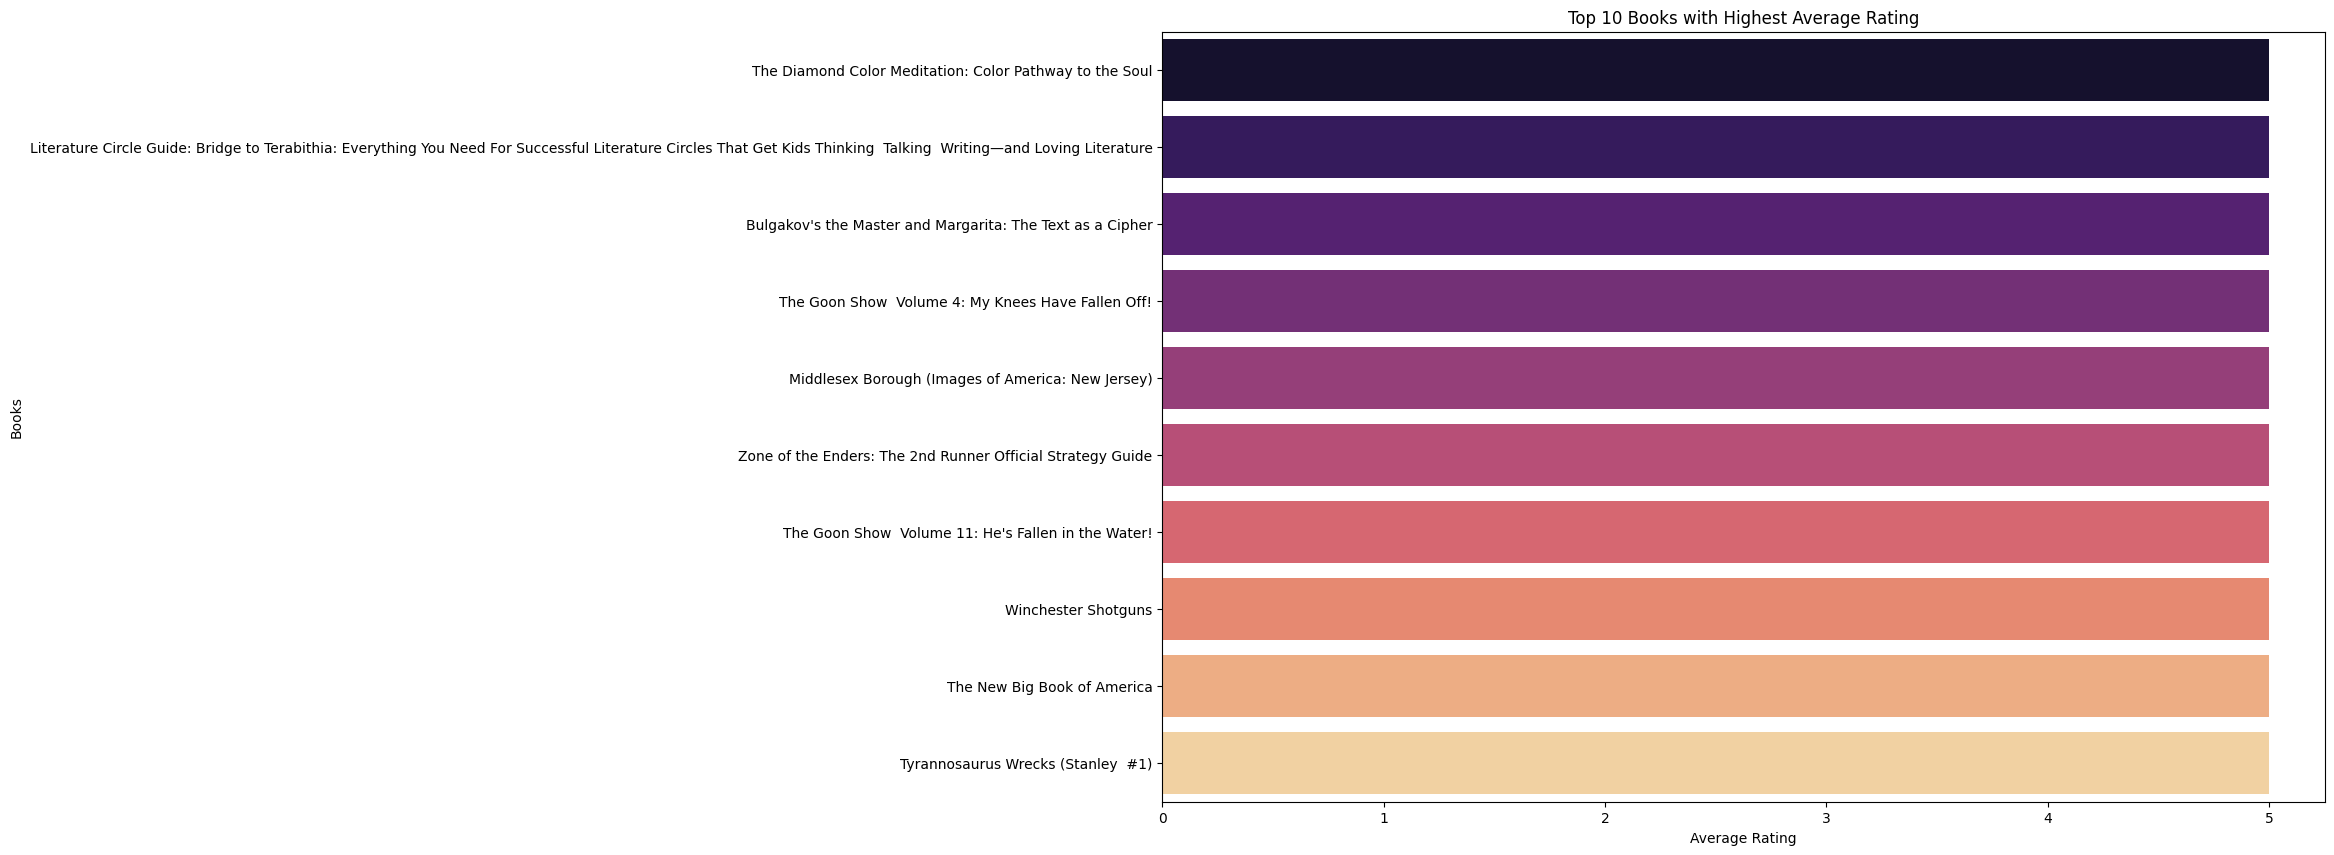

In [67]:
# For books with the same rating, we order them by number of ratings
highest_average_rating = df_book.sort_values(by=["average_rating", "ratings_count"], ascending=False).head(10).set_index("title")
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="average_rating", y=highest_average_rating.index, data=highest_average_rating, hue=highest_average_rating.index, legend=False, palette="magma")
ax.set_title("Top 10 Books with Highest Average Rating")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Books")
plt.show()

We can see that all the books in the top 10 list have an average rating of 5, and The Diamond Color Meditation: Color Pathway to the Soul is number 1 by rating count.

### Top 10 authors with most books

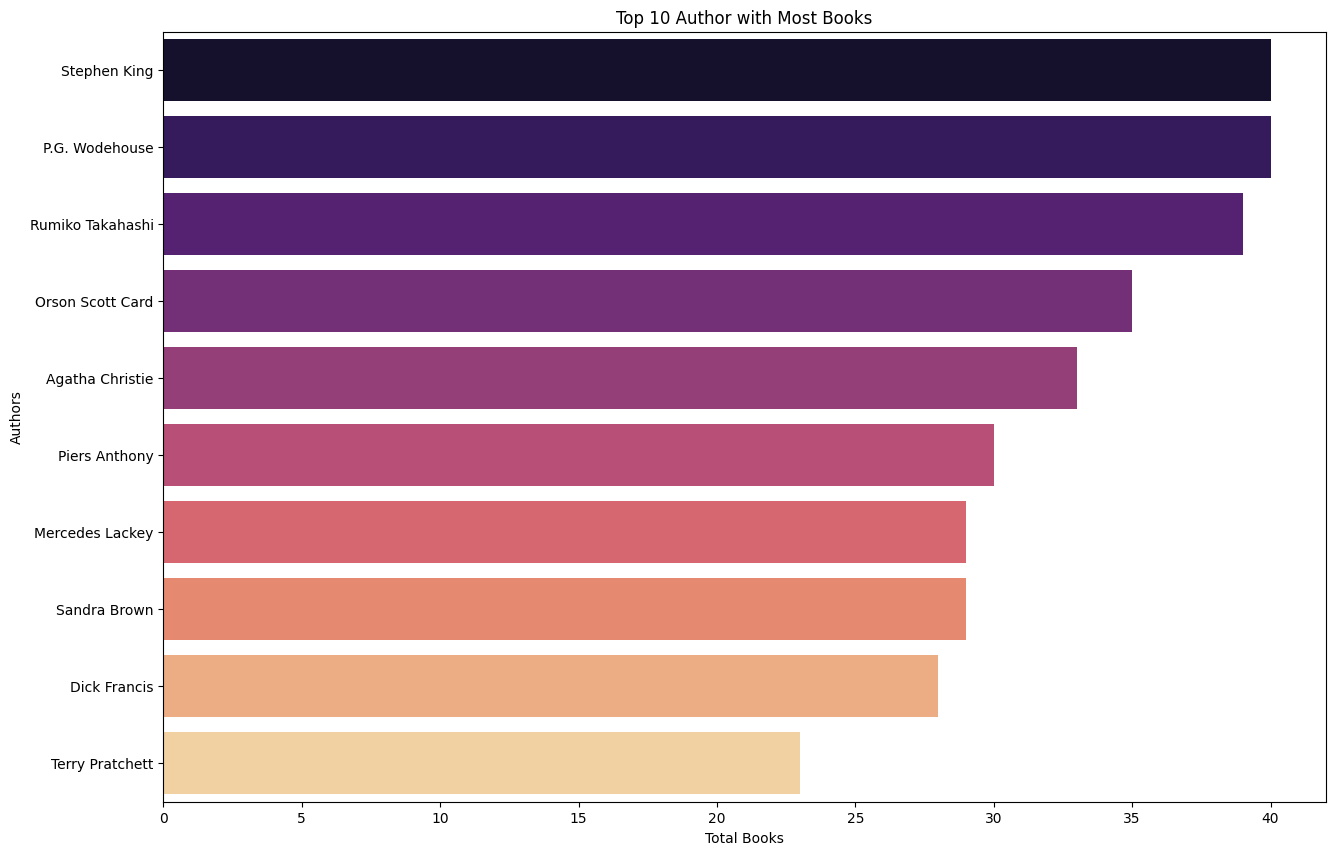

In [69]:
most_books = df_book.groupby("authors")["title"].count().reset_index().sort_values(by=["title"], ascending=False).head(10).set_index("authors")
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="title", y=most_books.index, data=most_books, hue=most_books.index, legend=False, palette="magma")
ax.set_title("Top 10 Author with Most Books")
ax.set_xlabel("Total Books")
ax.set_ylabel("Authors")
plt.show()

As we can see, Stephen King and P.G. Wodehouse have the highest total number of published books on the list, with each having 40 books.

### Top 10 publishers with the most books published

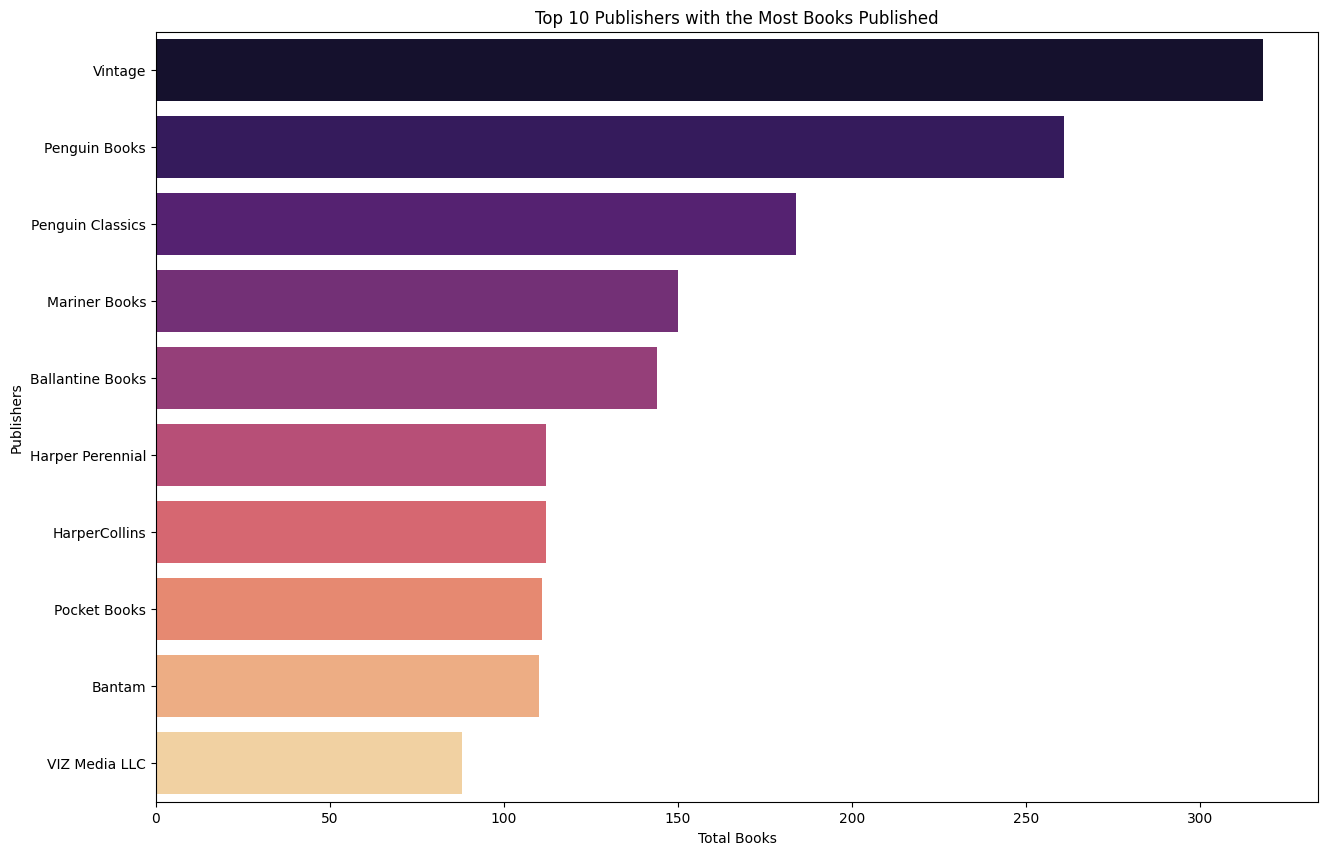

In [71]:
top_publishers = df_book.groupby("publisher")["title"].count().reset_index().sort_values(by=["title"], ascending=False).head(10).set_index("publisher")
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="title", y=top_publishers.index, data=top_publishers, hue=top_publishers.index, legend=False, palette="magma")
ax.set_title("Top 10 Publishers with the Most Books Published")
ax.set_xlabel("Total Books")
ax.set_ylabel("Publishers")
plt.show()

We can see that Vintage has the most books published on the list.

### Book distribution for all languages

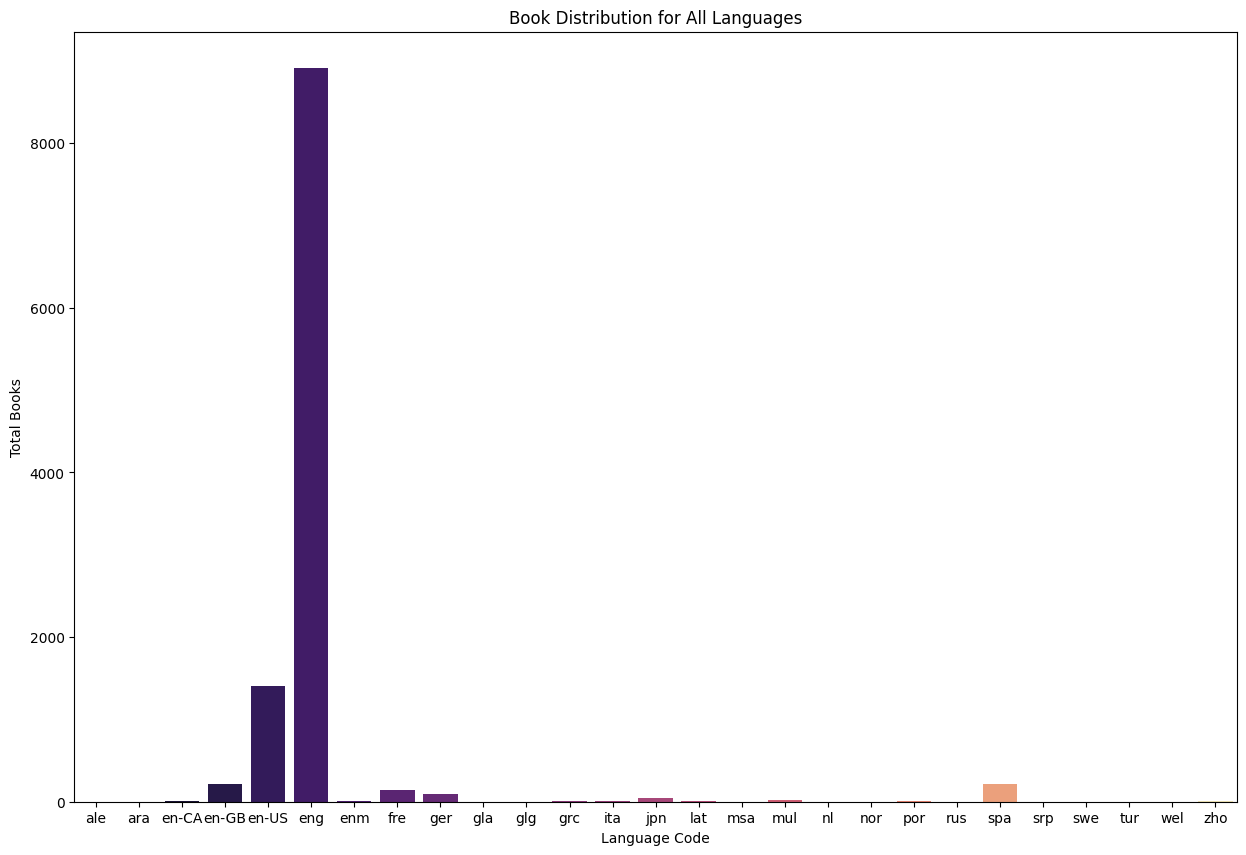

In [77]:
plt.figure(figsize=(15, 10))
book_language = df_book.groupby("language_code")["title"].count().reset_index().set_index("language_code")
ax = sns.barplot(x=book_language.index, y="title", data=book_language, hue="language_code", legend=False, palette="magma")
ax.set_title("Book Distribution for All Languages")
ax.set_xlabel("Language Code")
ax.set_ylabel("Total Books")
plt.show()

We can see that the majority of the books in Goodreads dataset are in the English language.

### Number of books published over the years

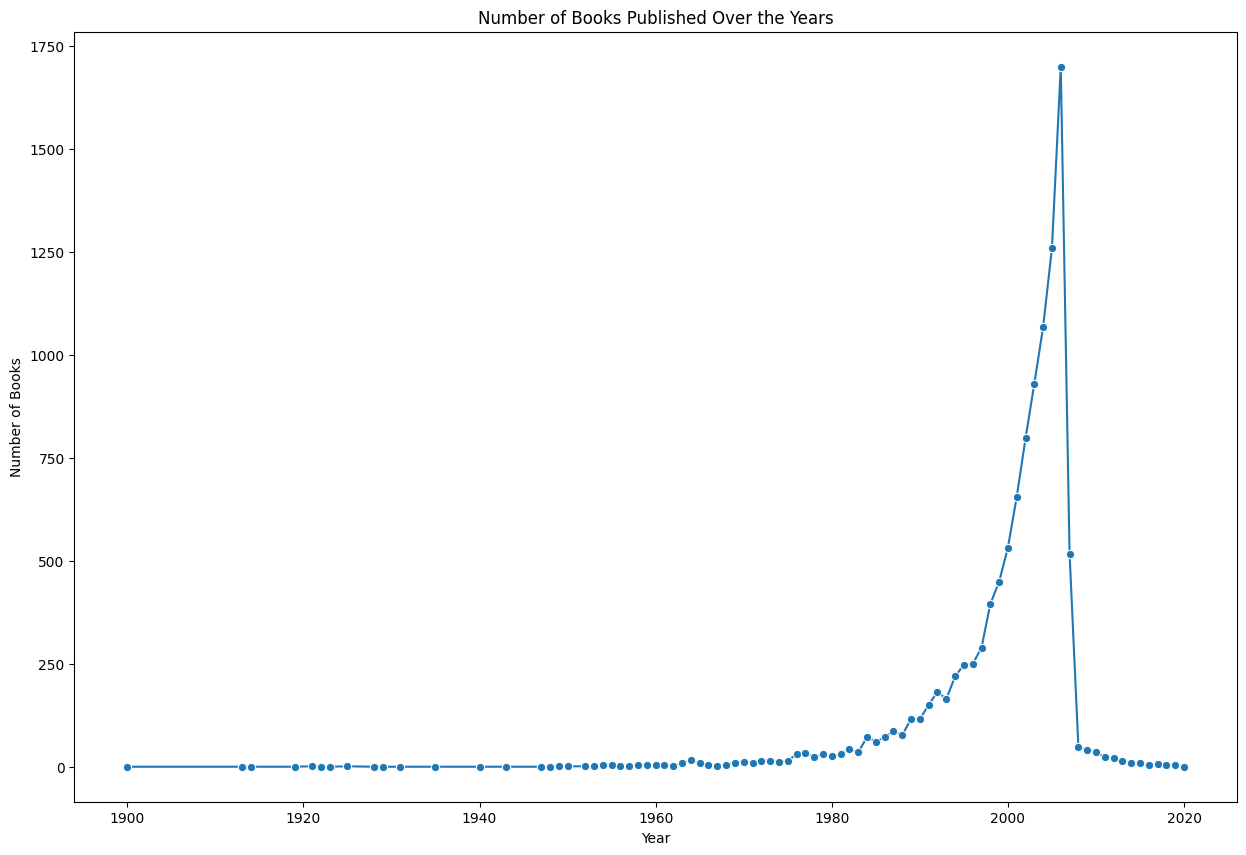

In [88]:
df_book["publication_year"] = df_book["publication_date"].dt.year
publication_trend = df_book["publication_year"].value_counts().sort_index()
plt.figure(figsize=(15, 10))
ax = sns.lineplot(x=publication_trend.index, y=publication_trend.values, marker="o")
ax.set_title("Number of Books Published Over the Years")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Books")
plt.show;

In [100]:
publication_trend.sort_values(ascending=False)

publication_year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
        ... 
1923       1
1922       1
1919       1
1914       1
2020       1
Name: count, Length: 87, dtype: int64

We can see that 2006 was the year with the most published books.